# Random Variables

A **random variable** is a function that takes as an input an outcome of a probability space and returns a real number.  Commonly encountered random variables are either discrete or continuous, or a mixture of the two.
  * A **discrete** random variable can take at most countably many distinct values.
  * A **continuous** random variable can take any value in some interval of real numbers.

Values of a random variable can be simulated and analyzed much like the outcomes of a probability space.  However, several additional tools are available for random variables.

<a id='contents'></a>

Be sure to import Symbulate using the following commands.
<a id='rv'></a>

In [1]:
from symbulate import *
%matplotlib inline

### Defining a random variable with RV

The `RV` class defines random variables on a probability space.  A random variable is a function which maps each outcome of a probability space to a real number; therefore a probability space must be defined first.

*Example.* Consider the random variable $X$ representing the number of Heads in 5 flips of a fair coin.  With 1 representing Heads and 0 Tails, we can count the number of Heads by summing the 0/1 values.  We define a probability space corresponding to 5 flips of a fair coin, and then a RV on that space which takes an outcome and sums its values.

In [2]:
P = BoxModel([0, 1], size=5)
X = RV(P, sum)

A random variable can be called as a function to return its value for a particular outcome in the probability space.

In [3]:
outcome = (0, 1, 0, 1, 1)
X(outcome)

3

If no function is specified in `RV`, the default is the identity function, `f(x) = x`.

In [4]:
P = Normal(mean=0, sd=1)
X = RV(P)
X(-0.5)

-0.5

Like the probability space defintions, the `RV` command only defines a random variable.  Simulation tools like `.sim()`, `.tabulate()`, `.filter()`, and `.count()`  work for `RV` just like for `ProbabilitySpace`. These will be covered in the chapters Simulation and Summarization.

Random variables can also be specified by user defined functions.

*Example.* Ten cards labeled 1, 2, $\ldots$ , 10 are shuffled and dealt one at a time. Let $X$ be the number of the cards (out of ten) for which the number on the card matches its position in the deal. (For example, a match occurs if card 3 is the third card dealt.)

In [8]:
n = 10
labels = list(range(n))
# remember, Python starts the index at 0, so the cards are labebeled 0, ..., 9

def number_matches(x):
    count = 0
    for i in range(n):
        if x[i] == labels[i]:
            count += 1
    return count


P = BoxModel(labels, size=n, replace=False)
X = RV(P, number_matches)
X.sim(10000)

0,2
1,3
2,0
3,0
4,0
5,0
6,0
7,1
8,1
...,...
9999,2


<a id='RVevent'></a>

### Important Note: Random variables versus distributions

Random variables and distributions are two distinct concepts.  For example, the random variables in each of the following situations has a Binomial(5, 0.5) distribution.
- $X$ is the number of Heads in five flips of a fair coin
- $Y$ is the number of Tails in five flips of a fair coin
- $Z$ is the number of even numbers rolled in five rolls of a fair six-sided die
- $W$ is the number of boys in a random sample of five births

Each of these situations involves a different probability space (coins, dice, births) with a random variable which counts according to different criteria (Heads, Tails, evens, boys).  These examples illustrate that knowledge that a random variable has a specific distribution (e.g. Binomial(5, 0.5)) does not necessarily convey any information about the underlying observational units or variable being measured.  This is why we say a specification like `X = RV(Binomial(n=5, p=0.5))` defines a random variable `X` on an *unspecified probability space* via an *unspecified function*.

It is important not to confuse a random variable with its distribution.  For example, suppose that a coin is flipped 5 times and $X$ represents the number of Heads and $Y$ the number of Tails in the 5 flips (so $Y = 5 - X$).  Note that $X$ and $Y$ are two different random variables; they measure different things.  For example, if the outcome of the flips is `(1, 0, 0, 1, 0)` then $X = 2$ but $Y = 3$.  In fact, in this example the values of $X$ and $Y$ are unequal for every outcome in the probability space (that is, $P(X = Y) = 0$).  

In [13]:
P = BoxModel([1, 0], size = 5)
X = RV(P, sum)
Y = 5 - X
(X == Y).sim(10000).tabulate()

False,10000
Total,10000


However, while $X$ and $Y$ are two different random variables, they do have the same distribution over many outcomes.

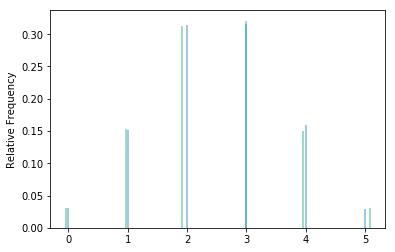

In [14]:
X.sim(10000).plot()
Y.sim(10000).plot(jitter = True)